# Add Features to Training Set - Iteration 1

In [4]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def target_rel(data, feature, feature_title=None, color=None):
    
    import pandas as pd
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Arrival Delay by {feature_title}')

    sns.barplot(ax=axes[0], data=data, x=feature, y='arr_delay', color=color)
    sns.stripplot(ax=axes[1], data=data,x=feature, y='arr_delay', alpha = 0.3)
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)

In [6]:
with open('df_train_step1output.pickle','rb') as flight_data_file:
     df_train = pickle.load(flight_data_file)

In [7]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

### Features Based on Flight Date

In [8]:
df_train['year'] = df_train['fl_date'].dt.year
df_train['month'] = df_train['fl_date'].dt.month
df_train['day'] = df_train['fl_date'].dt.day
df_train['day_of_week'] = df_train['fl_date'].dt.day_name()
df_train["is_weekend"] = df_train['fl_date'].dt.dayofweek > 4

In [9]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,year,month,day,day_of_week,is_weekend
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,73.0,51.0,33.0,1.0,156.0,2019,4,20,Saturday,True
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,181.0,183.0,153.0,1.0,1013.0,2019,7,15,Monday,False
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,95.0,84.0,62.0,1.0,432.0,2018,2,22,Thursday,False
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,100.0,101.0,69.0,1.0,414.0,2018,7,20,Friday,False
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,125.0,120.0,92.0,1.0,575.0,2019,4,12,Friday,False


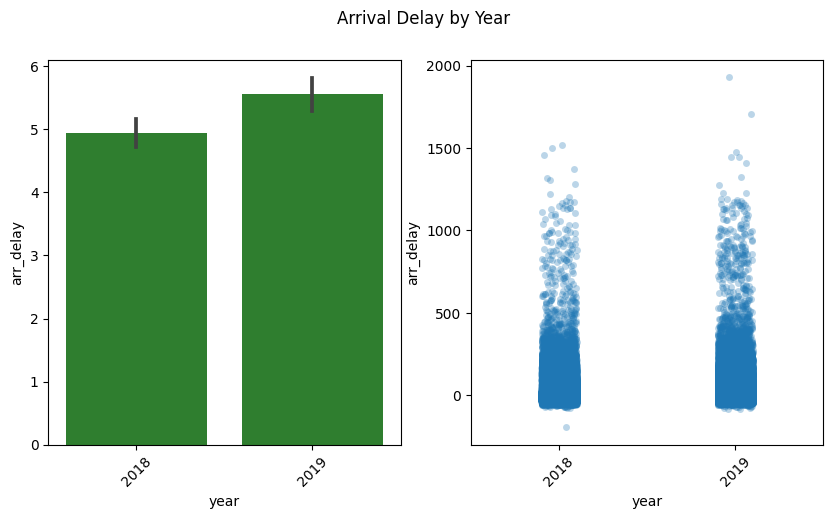

In [10]:
target_rel(data=df_train, feature='year', feature_title='Year', color='forestgreen')

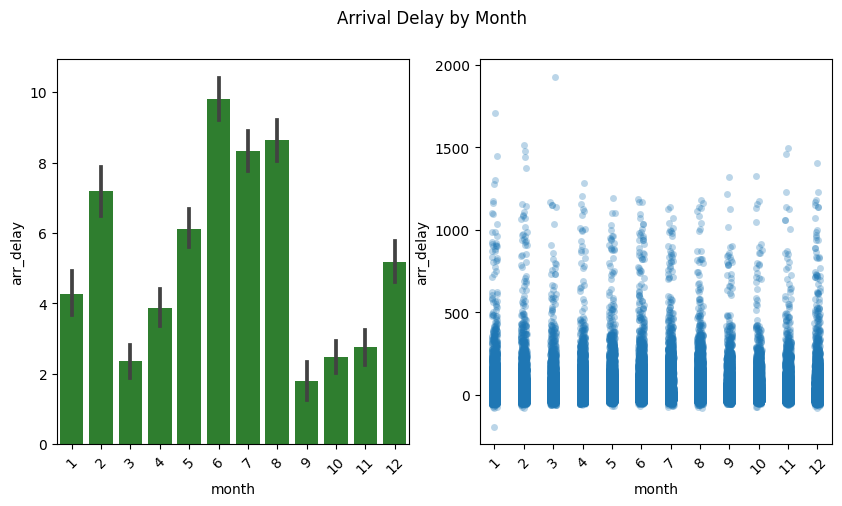

In [11]:
target_rel(data=df_train, feature='month', feature_title='Month', color='forestgreen')

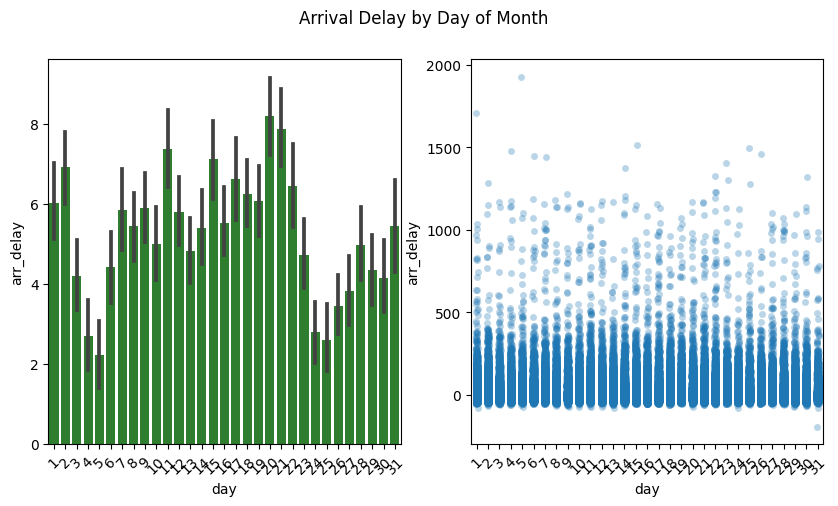

In [12]:
target_rel(data=df_train, feature='day', feature_title='Day of Month', color='forestgreen')

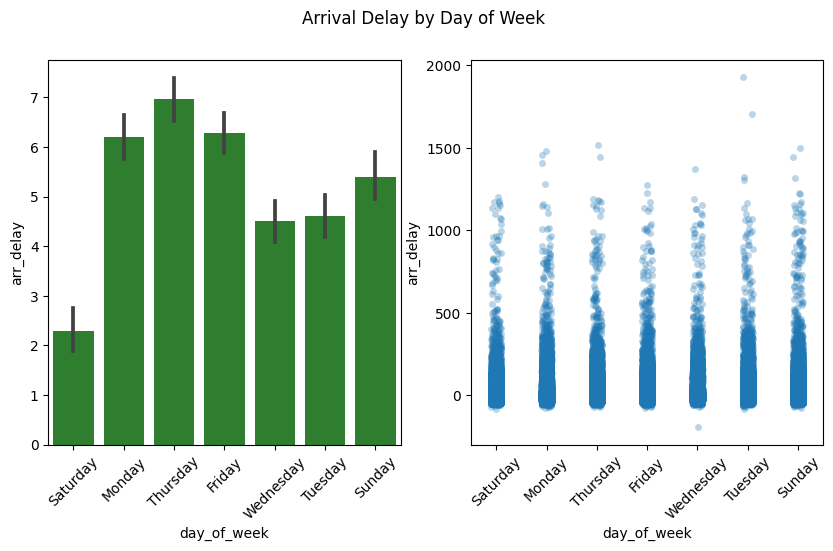

In [13]:
target_rel(data=df_train, feature='day_of_week', feature_title='Day of Week', color='forestgreen')

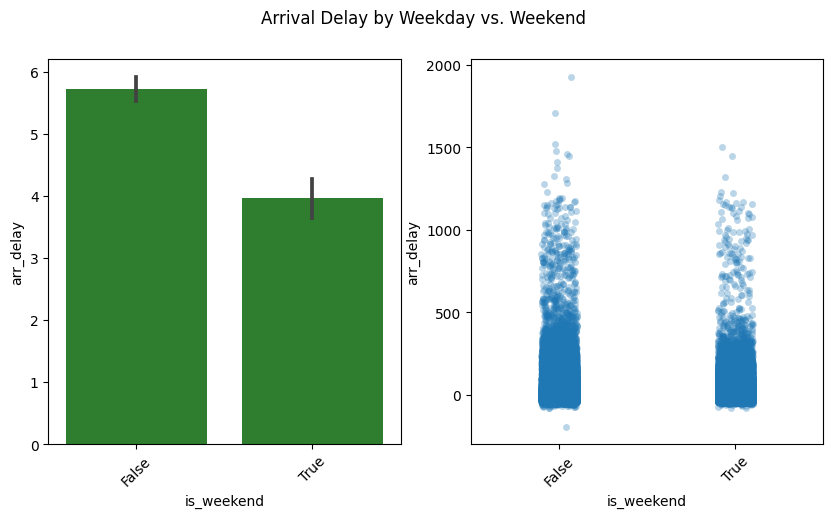

In [14]:
target_rel(data=df_train, feature='is_weekend', feature_title='Weekday vs. Weekend', color='forestgreen')

In [15]:
season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'}
df_train["season"] = df_train["month"].map(season_dict)


In [16]:
with open(r'..\..\data\v2\season_dict.pickle','wb') as flight_data_file:
     pickle.dump(season_dict, flight_data_file)

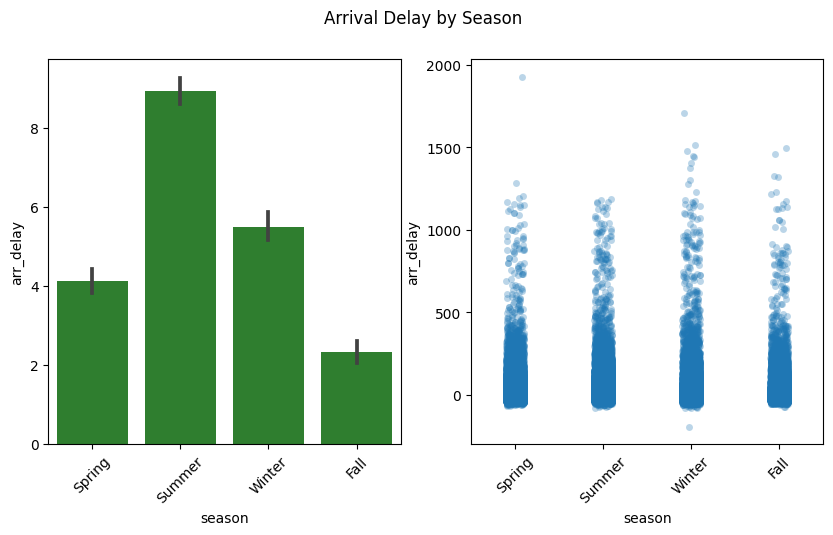

In [17]:
target_rel(data=df_train, feature='season', feature_title='Season', color='forestgreen')

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_train['is_holiday'] = df_train['fl_date'].isin(holidays)

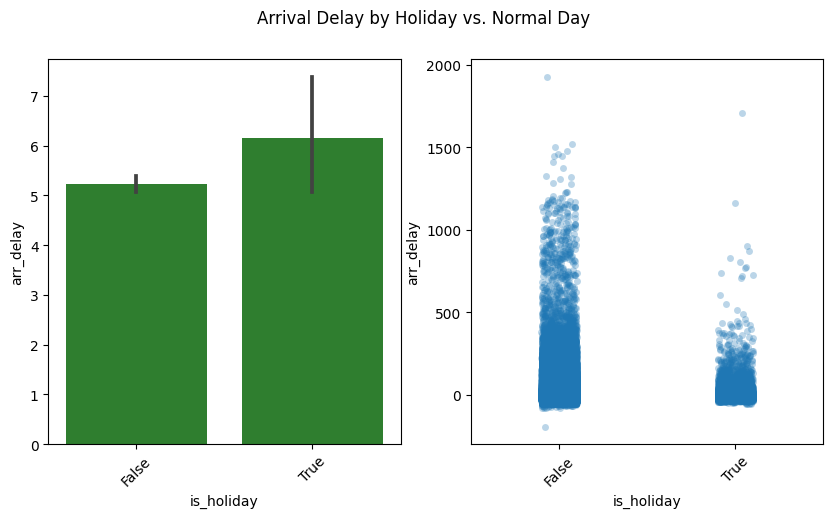

In [19]:
target_rel(data=df_train, feature='is_holiday', feature_title='Holiday vs. Normal Day', color='forestgreen')

### Features Based on Departure / Arrival Time

In [20]:
df_train['crs_dep_time_hour'] = df_train['crs_dep_time'].dt.hour
df_train['crs_arr_time_hour'] = df_train['crs_arr_time'].dt.hour

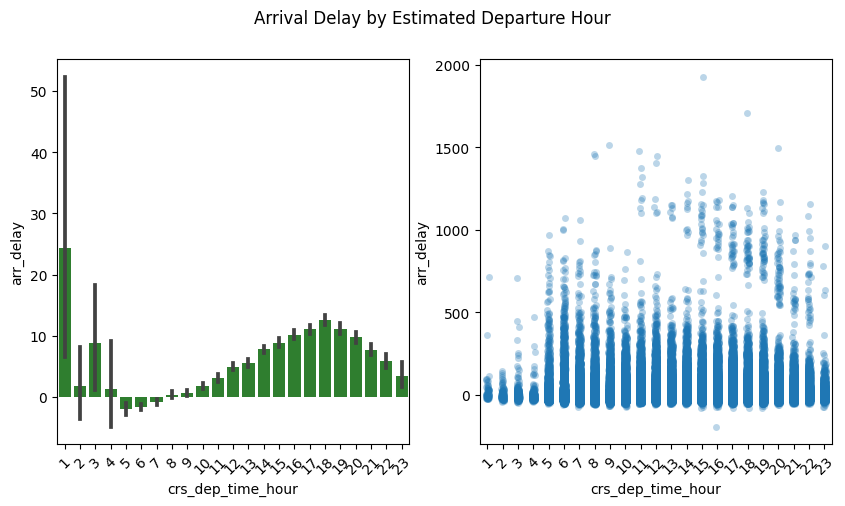

In [21]:
target_rel(data=df_train, feature='crs_dep_time_hour', feature_title='Estimated Departure Hour', color='forestgreen')

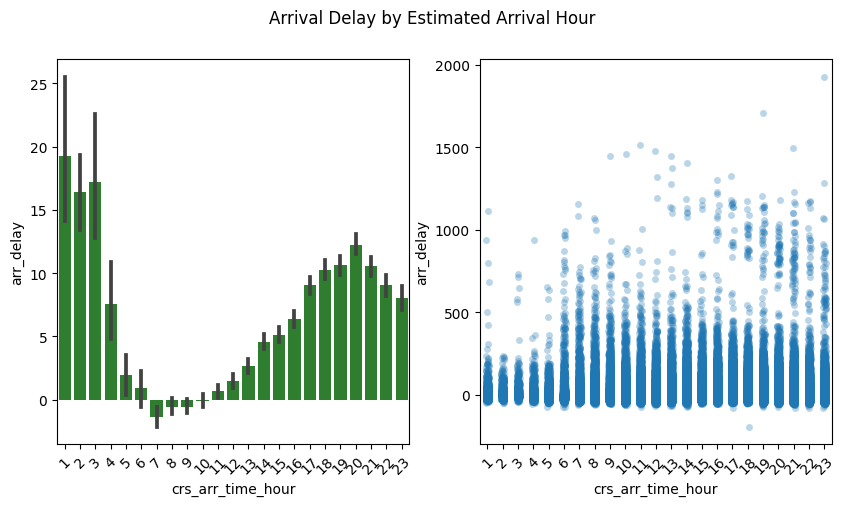

In [22]:
target_rel(data=df_train, feature='crs_arr_time_hour', feature_title='Estimated Arrival Hour', color='forestgreen')

In [23]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_train['crs_dep_time_of_day'] = pd.cut(df_train['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_train['crs_arr_time_of_day'] = pd.cut(df_train['crs_arr_time_hour'], bins=cut_bins, labels=cut_labels_5)

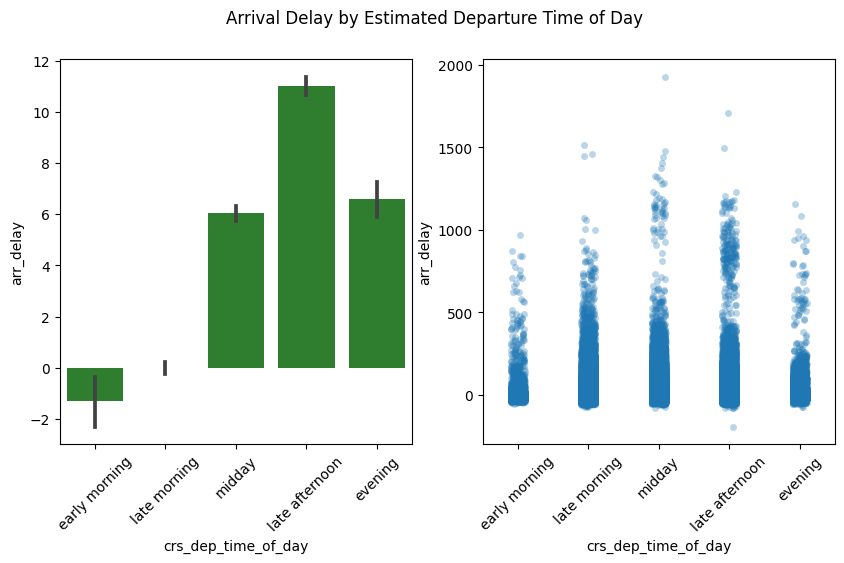

In [24]:
target_rel(data=df_train, feature='crs_dep_time_of_day', feature_title='Estimated Departure Time of Day', color='forestgreen')

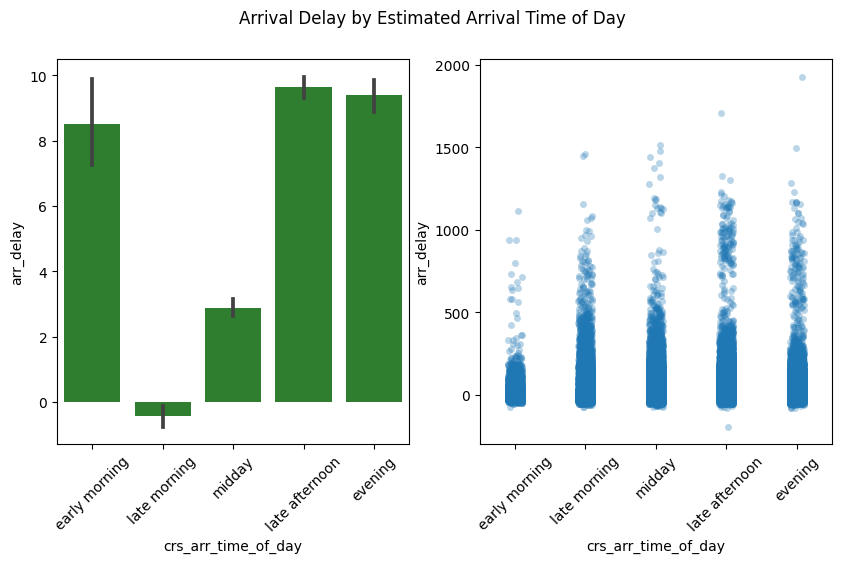

In [25]:
target_rel(data=df_train, feature='crs_arr_time_of_day', feature_title='Estimated Arrival Time of Day', color='forestgreen')

### Features Based on Origin / Destination

In [26]:
new_origin = df_train['origin_city_name'].str.split(",", n = 1, expand = True)
new_dest = df_train['dest_city_name'].str.split(",", n = 1, expand = True)
df_train['origin_state'] = new_origin[1].str.strip()
df_train['dest_state'] = new_dest[1].str.strip()

In [27]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC and Puerto Rico

state_dict = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
    'PR': 'Other',
    'VI': 'Other',
    'TT': 'Other'
}
len(state_dict)

54

In [28]:
import pickle

with open(r'..\..\data\v2\state_dict.pickle','wb') as flight_data_file:
     pickle.dump(state_dict, flight_data_file)

In [29]:
df_train["origin_region"] = df_train["origin_state"].map(state_dict)
df_train["dest_region"] = df_train["dest_state"].map(state_dict)

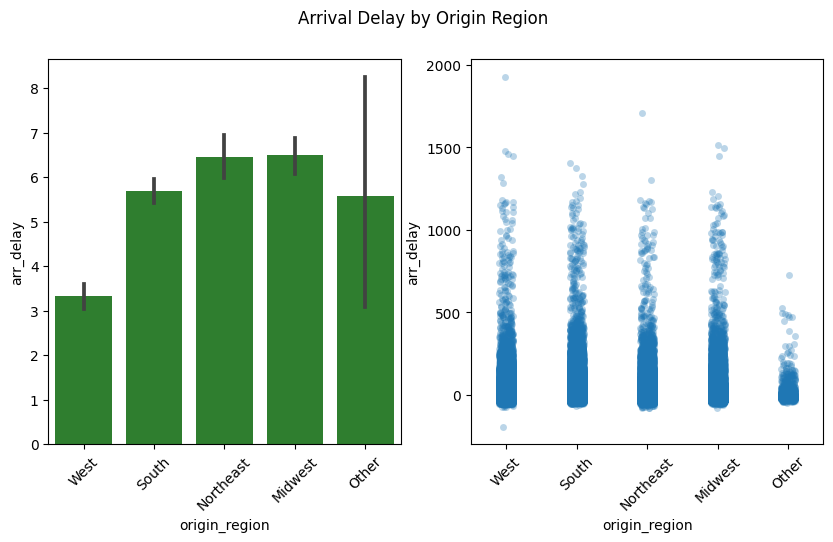

In [30]:
target_rel(data=df_train, feature='origin_region', feature_title='Origin Region', color='forestgreen')

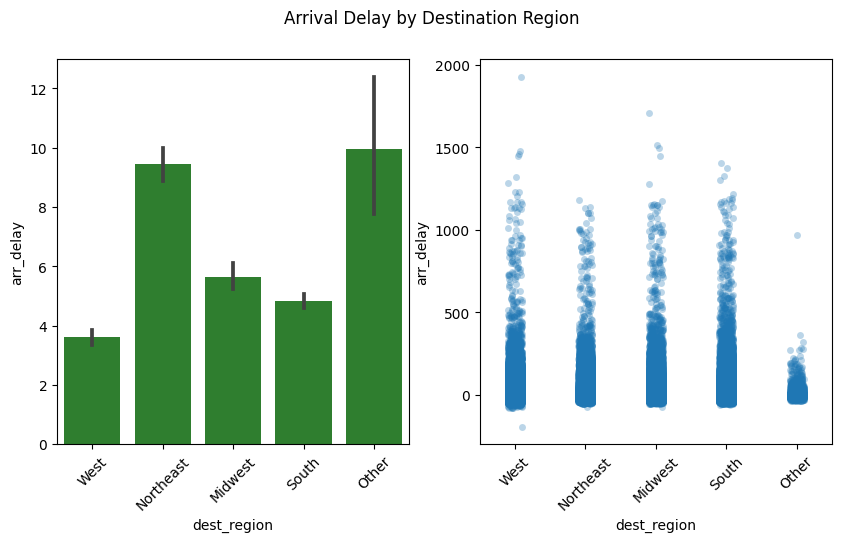

In [31]:
target_rel(data=df_train, feature='dest_region', feature_title='Destination Region', color='forestgreen')

In [32]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_hour', 'crs_arr_time_hour',
       'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_state',
       'dest_state', 'origin_region', 'dest_region'],
      dtype='object')

In [33]:
# df_train['mean_mkt_carrier_delay'] = df_train.groupby(['mkt_unique_carrier'])['arr_delay'].transform('mean')
# df_train['mean_op_carrier_delay'] = df_train.groupby(['op_unique_carrier'])['arr_delay'].transform('mean')

# df_train['mean_origin_airport_delay'] = df_train.groupby(['origin_airport_id'])['arr_delay'].transform('mean')
# df_train['mean_dest_airport_delay'] = df_train.groupby(['dest_airport_id'])['arr_delay'].transform('mean')

# df_train['mean_flight_delay'] = df_train.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'])['arr_delay'].transform('mean')

In [34]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,Spring,False,22,23,evening,evening,CA,CA,West,West
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,Summer,False,13,16,midday,late afternoon,FL,PA,South,Northeast
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,Winter,False,21,23,evening,evening,GA,IN,South,Midwest
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,Summer,False,13,14,midday,midday,CA,NV,West,West
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,Spring,False,18,19,late afternoon,late afternoon,NC,MO,South,Midwest


In [35]:
# sns.scatterplot(data=df_train, x='mean_mkt_carrier_delay', y='arr_delay', hue= 'mkt_unique_carrier', alpha=0.3)
# plt.legend(loc = 'upper left')

In [36]:
# sns.scatterplot(data=df_train, x='mean_op_carrier_delay', y='arr_delay', alpha=0.3)

In [37]:
# sns.scatterplot(data=df_train, x='mean_origin_airport_delay', y='arr_delay', alpha=0.3)

In [38]:
# sns.scatterplot(data=df_train, x='mean_dest_airport_delay', y='arr_delay', alpha=0.3)

In [39]:
# sns.scatterplot(data=df_train, x='mean_flight_delay', y='arr_delay')

In [40]:
# filter_df = df_train[df_train['arr_delay'] != df_train['mean_flight_delay']]

In [41]:
# sns.scatterplot(data=filter_df, x='mean_flight_delay', y='arr_delay')

In [42]:
# filter_df['arr_delay'].corr(filter_df['mean_flight_delay'])

### Make a pickle of the feature engineered training set

In [43]:
with open(r'..\..\data\v2\df_train_step2_fulloutput.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [44]:
feat_iteration1 = df_train[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'arr_delay']]

In [45]:
with open(r'..\..\data\v2\df_train_step2_subset1.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration1, flight_data_file)

# Add Features to Training Set - Iteration 2

In [46]:
import pickle

with open(r'..\..\data\v2\df_train_step2_fulloutput.pickle','rb') as flight_data_file:
     df_train = pickle.load(flight_data_file)

In [47]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,Spring,False,22,23,evening,evening,CA,CA,West,West
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,Summer,False,13,16,midday,late afternoon,FL,PA,South,Northeast
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,Winter,False,21,23,evening,evening,GA,IN,South,Midwest
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,Summer,False,13,14,midday,midday,CA,NV,West,West
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,Spring,False,18,19,late afternoon,late afternoon,NC,MO,South,Midwest


### Features based on Mean Arrival Delay by Group

In [48]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_hour', 'crs_arr_time_hour',
       'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_state',
       'dest_state', 'origin_region', 'dest_region'],
      dtype='object')

In [49]:
mean_mkt_carrier_delay = df_train.groupby('mkt_unique_carrier', as_index=False)['arr_delay'].mean()
mean_mkt_carrier_delay.set_index('mkt_unique_carrier',inplace=True)
mean_mkt_carrier_delay = mean_mkt_carrier_delay.T
mean_mkt_carrier_delay

mkt_unique_carrier,AA,AS,B6,DL,F9,G4,HA,NK,UA,VX,WN
arr_delay,6.303007,0.711088,11.075531,2.35919,9.667415,10.483679,0.675278,5.044747,8.821959,1.71608,3.090731


In [50]:
mkt_carrier_delay_dict = mean_mkt_carrier_delay.to_dict('records')

In [51]:
mkt_carrier_delay_dict

[{'AA': 6.303006725429799,
  'AS': 0.7110884006131835,
  'B6': 11.075531135531136,
  'DL': 2.3591899073683167,
  'F9': 9.667414566793234,
  'G4': 10.4836788707543,
  'HA': 0.6752776436504104,
  'NK': 5.04474685734056,
  'UA': 8.821959344038264,
  'VX': 1.7160804020100502,
  'WN': 3.0907309965190644}]

In [52]:
with open(r'..\..\data\v2\mkt_carrier_delay_dict.pickle','wb') as flight_data_file:
     pickle.dump(mkt_carrier_delay_dict, flight_data_file)

In [53]:
df_train['arr_delay'].mean()

5.253923536814741

In [54]:
df_train['mean_mkt_carrier_delay'] = df_train['mkt_unique_carrier'].map(mkt_carrier_delay_dict[0])
df_train['mean_mkt_carrier_delay'] = df_train['mean_mkt_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [55]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,False,22,23,evening,evening,CA,CA,West,West,8.821959
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,False,13,16,midday,late afternoon,FL,PA,South,Northeast,6.303007
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,False,21,23,evening,evening,GA,IN,South,Midwest,3.090731
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,False,13,14,midday,midday,CA,NV,West,West,3.090731
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,False,18,19,late afternoon,late afternoon,NC,MO,South,Midwest,6.303007


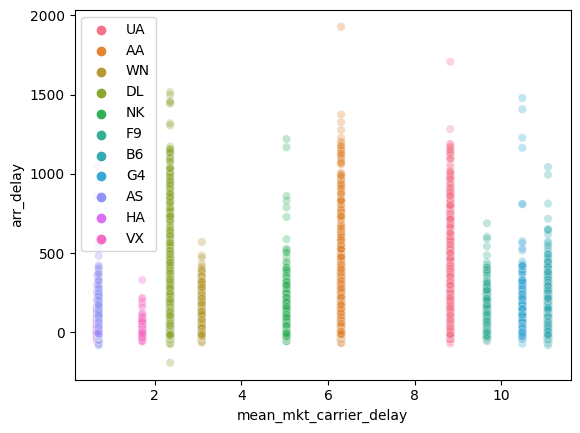

In [56]:
sns.scatterplot(data=df_train, x='mean_mkt_carrier_delay', y='arr_delay', hue= 'mkt_unique_carrier', alpha=0.3)
plt.legend(loc = 'upper left')

In [57]:
mean_op_carrier_delay = df_train.groupby('op_unique_carrier', as_index=False)['arr_delay'].mean()
mean_op_carrier_delay.set_index('op_unique_carrier',inplace=True)
mean_op_carrier_delay = mean_op_carrier_delay.T
mean_op_carrier_delay

op_unique_carrier,9E,9K,AA,AS,AX,B6,C5,CP,DL,EM,...,OH,OO,PT,QX,UA,VX,WN,YV,YX,ZW
arr_delay,3.667049,-5.1,6.092213,0.550692,15.527754,11.075531,24.036032,5.106944,0.167413,2.995327,...,7.313958,7.229355,5.202642,2.22432,6.397419,1.71608,3.090731,8.935767,3.149976,8.293954


In [58]:
op_carrier_delay_dict = mean_op_carrier_delay.to_dict('records')

In [59]:
op_carrier_delay_dict

[{'9E': 3.667049165857534,
  '9K': -5.1,
  'AA': 6.092213452703499,
  'AS': 0.550692426055736,
  'AX': 15.5277538107564,
  'B6': 11.075531135531136,
  'C5': 24.036032217041118,
  'CP': 5.106944444444444,
  'DL': 0.16741279198617082,
  'EM': 2.9953271028037385,
  'EV': 11.796736292428198,
  'F9': 9.667414566793234,
  'G4': 10.4836788707543,
  'G7': 9.08481567414282,
  'HA': 0.5488798370672098,
  'KS': 23.41304347826087,
  'MQ': 6.22642323174238,
  'NK': 5.04474685734056,
  'OH': 7.3139580862000795,
  'OO': 7.229355057705363,
  'PT': 5.202642276422765,
  'QX': 2.2243198223209326,
  'UA': 6.397419218733519,
  'VX': 1.7160804020100502,
  'WN': 3.0907309965190644,
  'YV': 8.935767278406873,
  'YX': 3.149976237354878,
  'ZW': 8.293954283272805}]

In [60]:
with open(r'..\..\data\v2\op_carrier_delay_dict.pickle','wb') as flight_data_file:
     pickle.dump(op_carrier_delay_dict, flight_data_file)

In [61]:
df_train['mean_op_carrier_delay'] = df_train['op_unique_carrier'].map(op_carrier_delay_dict[0])
df_train['mean_op_carrier_delay'] = df_train['mean_op_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [62]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,22,23,evening,evening,CA,CA,West,West,8.821959,7.229355
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,13,16,midday,late afternoon,FL,PA,South,Northeast,6.303007,6.092213
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,21,23,evening,evening,GA,IN,South,Midwest,3.090731,3.090731
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,13,14,midday,midday,CA,NV,West,West,3.090731,3.090731
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,18,19,late afternoon,late afternoon,NC,MO,South,Midwest,6.303007,6.092213


<AxesSubplot: xlabel='op_unique_carrier', ylabel='arr_delay'>

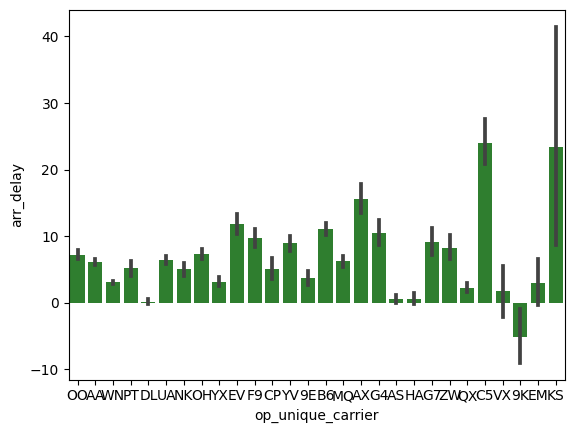

In [63]:
sns.barplot(data=df_train, x='op_unique_carrier', y='arr_delay', color='forestgreen')

### Make a pickle of the feature engineered training set

In [64]:
with open(r'..\..\data\v2\df_train_step2_fulloutput2.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [65]:
feat_iteration2 = df_train[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region','mean_mkt_carrier_delay','mean_op_carrier_delay', 'arr_delay']]

In [66]:
with open(r'..\..\data\v2\df_train_step2_subset2.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration2, flight_data_file)

# Add Features to Training Set - Iteration 3

In [67]:
import pickle

with open(r'..\..\data\v2\df_train_step2_fulloutput2.pickle','rb') as flight_data_file:
     df_train = pickle.load(flight_data_file)

In [68]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,22,23,evening,evening,CA,CA,West,West,8.821959,7.229355
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,13,16,midday,late afternoon,FL,PA,South,Northeast,6.303007,6.092213
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,21,23,evening,evening,GA,IN,South,Midwest,3.090731,3.090731
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,13,14,midday,midday,CA,NV,West,West,3.090731,3.090731
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,18,19,late afternoon,late afternoon,NC,MO,South,Midwest,6.303007,6.092213


### Features based on Mean Arrival Delay by Group

In [69]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_hour', 'crs_arr_time_hour',
       'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_state',
       'dest_state', 'origin_region', 'dest_region', 'mean_mkt_carrier_delay',
       'mean_op_carrier_delay'],
      dtype='object')

In [70]:
mean_route_delay = df_train.groupby(['origin','dest'], as_index=False)['arr_delay'].mean()
mean_route_delay['route'] = mean_route_delay['origin'] + mean_route_delay['dest']
mean_route_delay.drop(columns = ['origin','dest'], inplace=True)
mean_route_delay.set_index('route',inplace=True)
mean_route_delay = mean_route_delay.T
mean_route_delay

route,ABEATL,ABEBNA,ABECLT,ABEDTW,ABEFLL,ABEMYR,ABEORD,ABEPGD,ABEPHL,ABEPIE,...,XNAPHL,XNASFB,XNASFO,XNAVPS,XWADEN,YAKCDV,YAKJNU,YKMSEA,YUMDFW,YUMPHX
arr_delay,0.511628,-14.0,1.204082,-1.575,31.5,14.5,3.489796,-12.142857,10.6,22.8,...,-19.0,4.75,-5.6,29.0,-14.6,-6.222222,-7.368421,8.229508,9.875,-0.949153


In [71]:
route_delay_dict = mean_route_delay.to_dict('records')

In [72]:
route_delay_dict

[{'ABEATL': 0.5116279069767442,
  'ABEBNA': -14.0,
  'ABECLT': 1.2040816326530612,
  'ABEDTW': -1.575,
  'ABEFLL': 31.5,
  'ABEMYR': 14.5,
  'ABEORD': 3.489795918367347,
  'ABEPGD': -12.142857142857142,
  'ABEPHL': 10.6,
  'ABEPIE': 22.8,
  'ABESFB': 12.363636363636363,
  'ABIDFW': 4.418367346938775,
  'ABQATL': -8.736842105263158,
  'ABQAUS': 8.588235294117647,
  'ABQBWI': -6.130434782608695,
  'ABQDAL': 3.4939759036144578,
  'ABQDEN': 2.1610169491525424,
  'ABQDFW': -2.453125,
  'ABQHOU': 2.7962962962962963,
  'ABQIAH': 1.3132530120481927,
  'ABQJFK': 39.785714285714285,
  'ABQLAS': 0.9863013698630136,
  'ABQLAX': -0.1557377049180328,
  'ABQMCI': -4.5,
  'ABQMCO': -7.0,
  'ABQMDW': -6.5,
  'ABQMSP': -16.4,
  'ABQOAK': 1.032258064516129,
  'ABQORD': -5.083333333333333,
  'ABQPDX': -5.777777777777778,
  'ABQPHX': 4.7371428571428575,
  'ABQSAN': -5.489795918367347,
  'ABQSAT': 195.0,
  'ABQSEA': 2.076923076923077,
  'ABQSFO': -0.5576923076923077,
  'ABQSJC': 39.714285714285715,
  'ABQSL

In [73]:
with open(r'..\..\data\v2\route_delay_dict.pickle','wb') as flight_data_file:
     pickle.dump(route_delay_dict, flight_data_file)

In [74]:
df_train['arr_delay'].mean()

5.253923536814741

In [75]:
df_train['route'] = df_train['origin'] + df_train['dest']
df_train['mean_route_delay'] = df_train['route'].map(route_delay_dict[0])
df_train['mean_route_delay'] = df_train['mean_route_delay'].fillna(5.115402956604673) # overall mean delay

In [76]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay,route,mean_route_delay
0,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,LAX,...,evening,evening,CA,CA,West,West,8.821959,7.229355,LAXSBP,-3.230769
1,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,MIA,...,midday,late afternoon,FL,PA,South,Northeast,6.303007,6.092213,MIAPHL,13.255814
2,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,ATL,...,evening,evening,GA,IN,South,Midwest,3.090731,3.090731,ATLIND,1.051643
3,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,SFO,...,midday,midday,CA,NV,West,West,3.090731,3.090731,SFOLAS,4.409214
4,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,CLT,...,late afternoon,late afternoon,NC,MO,South,Midwest,6.303007,6.092213,CLTSTL,2.373626


In [77]:
delay_compare = pd.DataFrame(df_train['arr_delay'].to_numpy(),df_train['mean_route_delay'])
delay_compare

,0
mean_route_delay,
-3.230769,-34.0
13.255814,0.0
1.051643,-14.0
4.409214,10.0
2.373626,19.0
...,...
5.347222,-11.0
7.779720,-10.0
0.102273,72.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


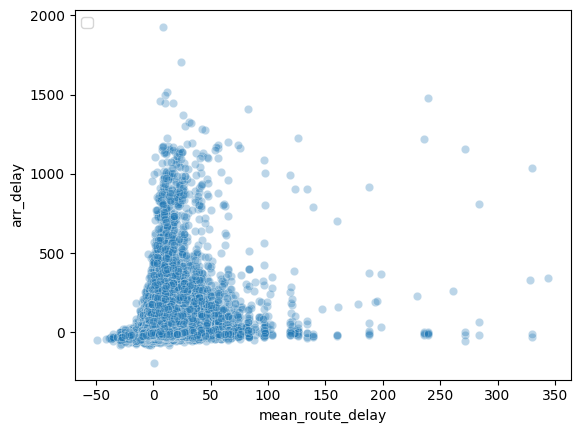

In [78]:
sns.scatterplot(data=df_train, x='mean_route_delay', y='arr_delay', alpha=0.3)
plt.legend(loc = 'upper left')

<AxesSubplot: xlabel='route', ylabel='arr_delay'>

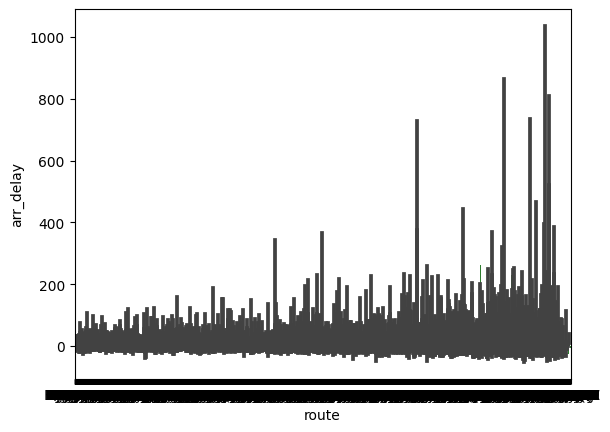

In [79]:
sns.barplot(data=df_train, x='route', y='arr_delay', color='forestgreen')

### Make a pickle of the feature engineered training set

In [80]:
with open(r'..\..\data\v2\df_train_step2_fulloutput3.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [81]:
feat_iteration2 = df_train[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region','mean_mkt_carrier_delay','mean_op_carrier_delay', 'mean_route_delay','arr_delay']]

In [82]:
with open(r'..\..\data\v2\df_train_step2_subset3.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration2, flight_data_file)

# Add Features to Test Set - Iteration 1

In [84]:
with open('df_test_step1output.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [85]:
df_test['year'] = df_test['fl_date'].dt.year
df_test['month'] = df_test['fl_date'].dt.month
df_test['day'] = df_test['fl_date'].dt.day
df_test['day_of_week'] = df_test['fl_date'].dt.day_name()
df_test["is_weekend"] = df_test['fl_date'].dt.dayofweek > 4

In [86]:
with open(r'..\..\data\v2\season_dict.pickle','rb') as flight_data_file:
     season_dict = pickle.load(flight_data_file)

In [87]:
df_test["season"] = df_test["month"].map(season_dict)

In [88]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_test['is_holiday'] = df_test['fl_date'].isin(holidays)

In [89]:
df_test['crs_dep_time_hour'] = df_test['crs_dep_time'].dt.hour
df_test['crs_arr_time_hour'] = df_test['crs_arr_time'].dt.hour

In [90]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_test['crs_dep_time_of_day'] = pd.cut(df_test['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_test['crs_arr_time_of_day'] = pd.cut(df_test['crs_arr_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [91]:
new_origin = df_test['origin_city_name'].str.split(",", n = 1, expand = True)
new_dest = df_test['dest_city_name'].str.split(",", n = 1, expand = True)
df_test['origin_state'] = new_origin[1].str.strip()
df_test['dest_state'] = new_dest[1].str.strip()

In [92]:
with open(r'..\..\data\v2\state_dict.pickle','rb') as flight_data_file:
     state_dict = pickle.load(flight_data_file)

In [93]:
df_test["origin_region"] = df_test["origin_state"].map(state_dict)
df_test["dest_region"] = df_test["dest_state"].map(state_dict)

In [94]:
# df_test['mean_mkt_carrier_delay'] = df_test.groupby(['mkt_unique_carrier'])['arr_delay'].transform('mean')
# df_test['mean_op_carrier_delay'] = df_test.groupby(['op_unique_carrier'])['arr_delay'].transform('mean')

# df_test['mean_origin_airport_delay'] = df_test.groupby(['origin_airport_id'])['arr_delay'].transform('mean')
# df_test['mean_dest_airport_delay'] = df_test.groupby(['dest_airport_id'])['arr_delay'].transform('mean')

# df_test['mean_flight_delay'] = df_test.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'])['arr_delay'].transform('mean')

In [95]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2019-10-26,G4,G4,G4,778,G4,320NV,778,14112,PIE,...,Fall,False,13,16,midday,late afternoon,FL,MI,South,Midwest
1,2019-03-10,AA,AA,AA,2030,AA,N826AW,2030,11278,DCA,...,Spring,False,12,13,midday,midday,DC,NC,South,South
2,2018-12-11,WN,WN,WN,1480,WN,N7876A,1480,14057,PDX,...,Winter,False,12,14,midday,midday,OR,CA,West,West
3,2019-12-22,DL,DL,DL,2932,DL,N707TW,2932,12892,LAX,...,Winter,False,22,6,evening,late morning,CA,MA,West,Northeast
4,2019-07-15,DL,DL,DL,2762,DL,N314DN,2762,12889,LAS,...,Summer,False,17,19,late afternoon,late afternoon,NV,UT,West,West


### Make a pickle of the feature engineered test set

In [96]:
with open(r'..\..\data\v2\df_test_step2_fulloutput.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [97]:
feat_iteration1 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'arr_delay']]

In [98]:
with open(r'..\..\data\v2\df_test_step2_subset1.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration1, flight_data_file)

# Add Features to Test Set - Iteration 2

In [99]:
import pickle

with open(r'..\..\data\v2\df_test_step2_fulloutput.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [100]:
with open(r'..\..\data\v2\mkt_carrier_delay_dict.pickle','rb') as flight_data_file:
     mkt_carrier_delay_dict = pickle.load(flight_data_file)

In [101]:
df_test['mean_mkt_carrier_delay'] = df_test['mkt_unique_carrier'].map(mkt_carrier_delay_dict[0])
df_test['mean_mkt_carrier_delay'] = df_test['mean_mkt_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [102]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay
0,2019-10-26,G4,G4,G4,778,G4,320NV,778,14112,PIE,...,False,13,16,midday,late afternoon,FL,MI,South,Midwest,10.483679
1,2019-03-10,AA,AA,AA,2030,AA,N826AW,2030,11278,DCA,...,False,12,13,midday,midday,DC,NC,South,South,6.303007
2,2018-12-11,WN,WN,WN,1480,WN,N7876A,1480,14057,PDX,...,False,12,14,midday,midday,OR,CA,West,West,3.090731
3,2019-12-22,DL,DL,DL,2932,DL,N707TW,2932,12892,LAX,...,False,22,6,evening,late morning,CA,MA,West,Northeast,2.359190
4,2019-07-15,DL,DL,DL,2762,DL,N314DN,2762,12889,LAS,...,False,17,19,late afternoon,late afternoon,NV,UT,West,West,2.359190


In [103]:
with open(r'..\..\data\v2\op_carrier_delay_dict.pickle','rb') as flight_data_file:
     op_carrier_delay_dict = pickle.load(flight_data_file)

In [104]:
df_test['mean_op_carrier_delay'] = df_test['op_unique_carrier'].map(op_carrier_delay_dict[0])
df_test['mean_op_carrier_delay'] = df_test['mean_op_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [105]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay
0,2019-10-26,G4,G4,G4,778,G4,320NV,778,14112,PIE,...,13,16,midday,late afternoon,FL,MI,South,Midwest,10.483679,10.483679
1,2019-03-10,AA,AA,AA,2030,AA,N826AW,2030,11278,DCA,...,12,13,midday,midday,DC,NC,South,South,6.303007,6.092213
2,2018-12-11,WN,WN,WN,1480,WN,N7876A,1480,14057,PDX,...,12,14,midday,midday,OR,CA,West,West,3.090731,3.090731
3,2019-12-22,DL,DL,DL,2932,DL,N707TW,2932,12892,LAX,...,22,6,evening,late morning,CA,MA,West,Northeast,2.359190,0.167413
4,2019-07-15,DL,DL,DL,2762,DL,N314DN,2762,12889,LAS,...,17,19,late afternoon,late afternoon,NV,UT,West,West,2.359190,0.167413


### Make a pickle of the feature engineered test set

In [106]:
with open(r'..\..\data\v2\df_test_step2_fulloutput2.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [107]:
feat_iteration2 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'mean_mkt_carrier_delay','mean_op_carrier_delay','arr_delay']]

In [108]:
with open(r'..\..\data\v2\df_test_step2_subset2.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration2, flight_data_file)

### Make a pickle of the feature engineered test set

In [109]:
with open(r'..\..\data\v2\df_test_step2_fulloutput.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [110]:
feat_iteration1 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'arr_delay']]

In [111]:
with open(r'..\..\data\v2\df_test_step2_subset1.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration1, flight_data_file)

# Add Features to Test Set - Iteration 3

In [112]:
import pickle

with open(r'..\..\data\v2\df_test_step2_fulloutput2.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [113]:
with open(r'..\..\data\v2\route_delay_dict.pickle','rb') as flight_data_file:
     route_delay_dict = pickle.load(flight_data_file)

In [114]:
df_test['route'] = df_test['origin'] + df_test['dest']
df_test['mean_route_delay'] = df_test['route'].map(route_delay_dict[0])
df_test['mean_route_delay'] = df_test['mean_route_delay'].fillna(5.115402956604673) # overall mean delay

In [115]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay,route,mean_route_delay
0,2019-10-26,G4,G4,G4,778,G4,320NV,778,14112,PIE,...,midday,late afternoon,FL,MI,South,Midwest,10.483679,10.483679,PIEFNT,-8.266667
1,2019-03-10,AA,AA,AA,2030,AA,N826AW,2030,11278,DCA,...,midday,midday,DC,NC,South,South,6.303007,6.092213,DCACLT,-3.679245
2,2018-12-11,WN,WN,WN,1480,WN,N7876A,1480,14057,PDX,...,midday,midday,OR,CA,West,West,3.090731,3.090731,PDXBUR,12.609756
3,2019-12-22,DL,DL,DL,2932,DL,N707TW,2932,12892,LAX,...,evening,late morning,CA,MA,West,Northeast,2.359190,0.167413,LAXBOS,2.074074
4,2019-07-15,DL,DL,DL,2762,DL,N314DN,2762,12889,LAS,...,late afternoon,late afternoon,NV,UT,West,West,2.359190,0.167413,LASSLC,3.206452


### Make a pickle of the feature engineered test set

In [ ]:
with open(r'..\..\data\v2\df_test_step2_fulloutput3.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [ ]:
feat_iteration3 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'mean_mkt_carrier_delay','mean_op_carrier_delay','mean_route_delay','arr_delay']]

In [ ]:
with open(r'..\..\data\v2\df_test_step2_subset3.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration3, flight_data_file)